In [1]:
import pymaid
import navis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from matplotlib.ticker import PercentFormatter
from statannot import add_stat_annotation

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#initialize an empty dataframe
glomcontrol=pd.DataFrame(columns=['glomerulus', 'id', 'path length in glom', 'total feedforward connections', 'feedforward connections in glom', 'feedforward connections density'])

In [4]:
#fetch a group of neurons
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1neurons = pymaid.get_neuron(MD1OSNs)
#print(neurons)

Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

In [5]:
#get all feedforward connectivity
for n in MD1neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets="MD1 uPN")
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD1 04/06/21')
    connect= list(connectivity.loc[int(n.id),:])
    glomconnect=list(glom_connectivity.loc[n.id,:])

    #divide connectivity by length within glomerulus
    control= glomconnect/(dlength*1000)
    glomcontrol=glomcontrol.append({'glomerulus':'md1', 'id':int(n.id),'path length in glom':dlength, 'total feedforward connections':connect, 'feedforward connections in glom':glomconnect, 'feedforward connections density':control}, ignore_index=True)

453680.44


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


406781.8


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


434659.94


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


569447.6


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


445835.0


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


506129.0


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


391274.06


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


416095.0


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


529873.44


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


284710.38


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


629597.1


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#fetch a group of neurons
MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2neurons = pymaid.get_neuron(MD2OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [7]:
#get all feedforward connectivity
for n in MD2neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    print(skelid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets="690")
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD2 2022')
    connect= list(connectivity.loc[int(n.id),:])
    glomconnect=list(glom_connectivity.loc[n.id,:])

    #divide connectivity by length within glomerulus
    control= glomconnect/(dlength*1000)
    glomcontrol=glomcontrol.append({'glomerulus':'md2', 'id':int(n.id),'path length in glom':dlength, 'total feedforward connections':connect, 'feedforward connections in glom':glomconnect, 'feedforward connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


9064


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


204651.9


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


7209
141502.66


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


718


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138635.31


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


7983


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


152818.12


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


947


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167905.39


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


7325


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


140428.69


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


728


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


102887.84


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


7353


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


195558.47


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


7197


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


164012.03


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


7135


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


167272.22


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#fetch a group of neurons
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3neurons = pymaid.get_neuron(MD3OSNs)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
#get all feedforward connectivity
for n in MD3neurons:
    skeletonid=n.skeleton_id
    skelid=int(skeletonid)
    labels = pymaid.get_label_list()
    neuronlabels=labels[labels.skeleton_id==skelid]
    branchpoint=neuronlabels[neuronlabels.tag=='first branch point']

    if len(branchpoint) !=1:
        print('error, neuron skelid=%i does not have exactly 1 branchpoint tag'% skelid)
    else: bpnode=branchpoint.node_id.values[0]

    #cut the neuron
    dist,prox=navis.cut_skeleton(n, bpnode)
    dlength=dist.cable_length
    plength=prox.cable_length
    print(dlength)
    #pymaid.clear_cache()

    #get connectivity from OSNs to PN in volume
    connectivity = pymaid.adjacency_matrix(n, targets="11126")
    glom_connectivity=pymaid.filter_connectivity(connectivity, restrict_to='MD3 2022')
    connect= list(connectivity.loc[int(n.id),:])
    glomconnect=list(glom_connectivity.loc[n.id,:])

    #divide connectivity by length within glomerulus
    control= glomconnect/(dlength*1000)
    glomcontrol=glomcontrol.append({'glomerulus':'md3', 'id':int(n.id),'path length in glom':dlength, 'total feedforward connections':connect, 'feedforward connections in glom':glomconnect, 'feedforward connections density':control}, ignore_index=True)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


170986.05


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


150195.03


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


156733.62


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


188369.67


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


133558.53


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


138479.78


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


108313.91


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


144739.16


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


107448.98


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


123889.97


Regenerating:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
print(glomcontrol)

   glomerulus      id  path length in glom total feedforward connections  \
0         md1    7172        453680.437500                         [160]   
1         md1    7815        406781.812500                         [158]   
2         md1    1608        434659.937500                         [131]   
3         md1     873        569447.625000                         [113]   
4         md1    6736        445835.000000                         [115]   
5         md1     881        506129.000000                         [155]   
6         md1    6975        391274.062500                         [145]   
7         md1  324409        416095.000000                         [184]   
8         md1     953        529873.437500                         [151]   
9         md1    5021        284710.375000                          [89]   
10        md1     671        629597.125000                         [132]   
11        md2    9064        204651.906250                         [103]   
12        md

In [11]:
df=glomcontrol #lol

In [12]:
md1=df[df["glomerulus"]=="md1"]
md2=df[df["glomerulus"]=="md2"]
md3=df[df['glomerulus']=="md3"]
md1.head()

,glomerulus,id,path length in glom,total feedforward connections,feedforward connections in glom,feedforward connections density
0,md1,7172,453680.4375,[160],[160.0],[3.5267114641679915e-07]
1,md1,7815,406781.8125,[158],[156.0],[3.834979716552593e-07]
2,md1,1608,434659.9375,[131],[119.0],[2.7377724453843874e-07]
3,md1,873,569447.6250,[113],[110.0],[1.9316965278413446e-07]
4,md1,6736,445835.0000,[115],[115.0],[2.579429609608936e-07]


In [13]:
#make lists like a noob
md1_feedforward_inglom=md1["feedforward connections in glom"].values.tolist()
md1_feedforward_inglom=list(np.concatenate(md1_feedforward_inglom))

md2_feedforward_inglom=md2["feedforward connections in glom"].values.tolist()
md2_feedforward_inglom=list(np.concatenate(md2_feedforward_inglom))

md3_feedforward_inglom=md3["feedforward connections in glom"].values.tolist()
md3_feedforward_inglom=list(np.concatenate(md3_feedforward_inglom))

print(md3_feedforward_inglom)

[146.0, 127.0, 126.0, 176.0, 131.0, 142.0, 141.0, 142.0, 135.0, 126.0]


In [14]:
#make dataframe

data_dict = {"1": md1_feedforward_inglom, "2": md2_feedforward_inglom, "3": md3_feedforward_inglom}
pre_df = {"Glomerulus": [], "OSN → uPN synapses in glomerulus": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses in glomerulus"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → uPN synapses in glomerulus
0,1,160.0
1,1,156.0
2,1,119.0
3,1,110.0
4,1,115.0
5,1,151.0
6,1,145.0
7,1,181.0
8,1,139.0
9,1,89.0


In [15]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

/tmp/ipykernel_37188/1972367798.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.548e-03 U_stat=9.900e+01
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.389e-04 U_stat=0.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.000e+01


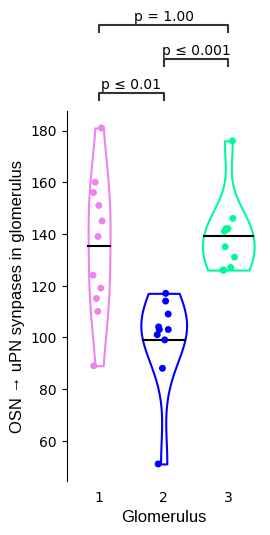

In [16]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → uPN synapses in glomerulus"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('OSN → uPN synpases in glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(0.04)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
plt.ticklabel_format(style='plain', axis='y')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("2", "3"), ("1", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/feedforward.svg', format="svg")
plt.show()

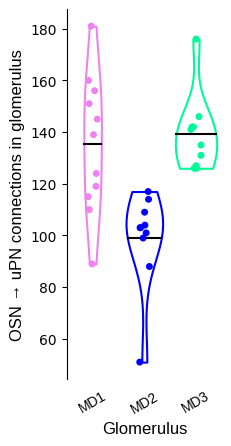

In [17]:
ax = my_violinplot2(data=[md1_feedforward_inglom, md2_feedforward_inglom, md3_feedforward_inglom], color="1")
ax = sns.stripplot(data=[md1_feedforward_inglom, md2_feedforward_inglom, md3_feedforward_inglom], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['MD1', 'MD2', 'MD3']
ax.set_ylabel('OSN → uPN connections in glomerulus', size=12, fontname="Liberation Sans")
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(0.05)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_xticklabels(labels,rotation = 30, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)

plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/feedforwardinglom.svg', format="svg")

In [18]:
#make lists like a noob
md1_feedforward_density=md1["feedforward connections density"].values.tolist()
md1_feedforward_density=list(np.concatenate(md1_feedforward_density))

md2_feedforward_density=md2["feedforward connections density"].values.tolist()
md2_feedforward_density=list(np.concatenate(md2_feedforward_density))

md3_feedforward_density=md3["feedforward connections density"].values.tolist()
md3_feedforward_density=list(np.concatenate(md3_feedforward_density))

In [19]:
print(md1_feedforward_density)
print(MD1OSNs)

[3.5267114641679915e-07, 3.834979716552593e-07, 2.7377724453843874e-07, 1.9316965278413446e-07, 2.579429609608936e-07, 2.983429125776235e-07, 3.705842372314163e-07, 4.349968156310458e-07, 2.623267938393307e-07, 3.125983729957154e-07, 1.9695134408372656e-07]
[7172, 7815, 1608, 873, 6736, 881, 6975, 324409, 953, 5021, 671]


In [20]:
#make dataframe

data_dict = {"1": md1_feedforward_density, "2": md2_feedforward_density, "3": md3_feedforward_density}
pre_df = {"Glomerulus": [], "OSN → uPN synapses per µm of cable overlap": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses per µm of cable overlap"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)


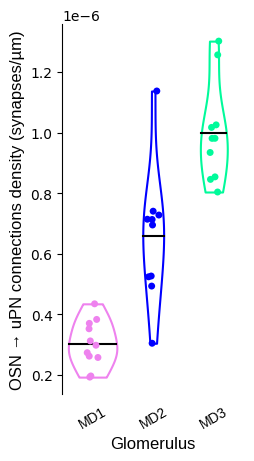

In [21]:
ax = my_violinplot2(data=[md1_feedforward_density, md2_feedforward_density, md3_feedforward_density], color="1")
ax = sns.stripplot(data=[md1_feedforward_density, md2_feedforward_density, md3_feedforward_density], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['MD1', 'MD2', 'MD3']
ax.set_ylabel('OSN → uPN connections density (synapses/µm)', size=12, fontname="Liberation Sans")
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_aspect(5000000)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_xticklabels(labels,rotation = 30, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
plt.ticklabel_format(style='sci', axis='y')

plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/feedforwardinglom_density.svg', format="svg")

/tmp/ipykernel_37188/617454994.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.473e-03 U_stat=5.000e+00
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.119e-03 U_stat=8.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.725e-04 U_stat=0.000e+00


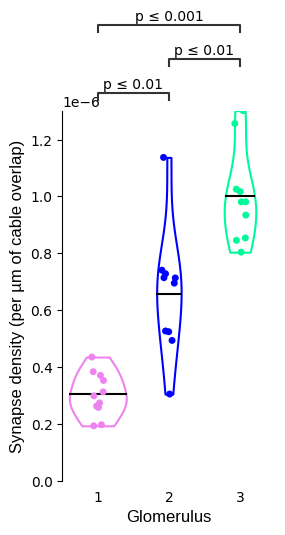

In [22]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → uPN synapses per µm of cable overlap"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse density (per µm of cable overlap)', size=12, fontname="Liberation Sans")
plt.ylim(0,0.0000013)
ax.set_aspect(4000000)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("2", "3"), ("1", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/feedforward_density.svg', format="svg")
plt.show()

In [23]:
#kruskal wallis test
kruskal=stats.kruskal(md1_feedforward_inglom, md2_feedforward_inglom, md3_feedforward_inglom)
print(kruskal)


KruskalResult(statistic=16.03033359620003, pvalue=0.00033041312315965315)


In [25]:
sp.posthoc_dunn([md1_feedforward_inglom, md2_feedforward_inglom, md3_feedforward_inglom], p_adjust = 'bonferroni')


,1,2,3
1,1.000000,0.003347,1.00000
2,0.003347,1.000000,0.00074
3,1.000000,0.000740,1.00000


In [ ]:
#means and sds
print(np.mean(md1_feedforward_inglom))
print(np.std(md1_feedforward_inglom))
print(np.mean(md2_feedforward_inglom))
print(np.std(md2_feedforward_inglom))
print(np.mean(md3_feedforward_inglom))
print(np.std(md3_feedforward_inglom))

135.36363636363637
25.353044383350337
98.9
17.705648816126452
138.5
13.727709204379295
